In [1]:
import numpy as np
import pandas
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import kagglehub
from kagglehub import KaggleDatasetAdapter

f:\Tyler\Documents\College, Part 2\CSCI-635\csci-635_assignment-2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
##################################################
##### STEP 1: PREPARING FEATURES AND TARGET ######
##################################################

file_path = "breast-cancer.csv"

# Load the dataset
data_frame = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "yasserh/breast-cancer-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# print("First 5 records:\n", data_frame.head())

data_frame.dropna(inplace=True)

X = data_frame.drop(columns=["id", "diagnosis"])
y = data_frame["diagnosis"] # if this doesn't work use y = data_frame.drop(columns=X.columns)
# y = pd.Seriesy.str.replace("M", "1").str.replace("B", "0")
y.replace("M", "1", inplace=True)
y.replace("B", "0", inplace=True)

features = X.columns

y = (pandas.DataFrame)(y)

print(f"X: {X}")
print(f"y: {y}")

X:      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  

In [3]:
##################################################
############ STEP 2: TRAIN-TEST SPLIT ############
##################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=35)

In [4]:
##################################################
############# STEP 3: NORMALIZATION ##############
##################################################

scaler = StandardScaler().fit(X_train, y_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f"X_train: {X_train}")
print(f"y_train: {y_train}")
print(f"X_test: {X_test}")
print(f"y_test: {y_test}")

X_train: [[ 1.6679483   0.87675229  1.58929572 ...  0.63076708  1.24449281
  -0.01451733]
 [-1.23227193 -0.2369047  -1.26293633 ... -1.74273857 -1.57044466
  -1.00553067]
 [-0.91858587  0.51788153 -0.95331773 ... -1.74273857 -0.70224204
  -0.98745248]
 ...
 [-0.41228556 -1.6376583  -0.4610321  ... -0.5018161  -0.20093014
   0.5858976 ]
 [ 2.02566047  0.7285734   1.97134438 ...  1.60099222 -1.3316494
  -0.70094061]
 [ 1.04883108  0.30487438  1.03214142 ...  0.50401917  0.55182842
  -0.42155045]]
y_train:     diagnosis
95          1
192         0
550         0
55          0
115         0
..        ...
482         0
254         1
418         0
564         1
492         1

[426 rows x 1 columns]
X_test: [[ 0.14079249  0.54334978  0.12278601 ...  1.02459097  1.25872564
   1.3944856 ]
 [-0.14812888 -0.94770033 -0.16693423 ... -0.15235398  0.76690229
   0.68121895]
 [-0.8360369   0.50167447 -0.85621369 ... -1.0930046   0.1169364
  -0.69655802]
 ...
 [ 1.48358895  1.33286544  1.40225106 ...  0

## Why might imbalanced data be a problem?

Imbalanced data can result in the model overfitting to the training data, as it develops a significant bias.

In [5]:
##################################################
######## STEP 4: HANDLING CLASS IMBALANCE ########
##################################################

X_resampled, y_resampled = SMOTE(random_state=35).fit_resample(X_train, y_train)
X_resampled

array([[ 1.6679483 ,  0.87675229,  1.58929572, ...,  0.63076708,
         1.24449281, -0.01451733],
       [-1.23227193, -0.2369047 , -1.26293633, ..., -1.74273857,
        -1.57044466, -1.00553067],
       [-0.91858587,  0.51788153, -0.95331773, ..., -1.74273857,
        -0.70224204, -0.98745248],
       ...,
       [-0.15213615,  0.04794552, -0.10120093, ...,  0.69408284,
         1.26759031,  1.07528896],
       [ 0.61359216, -0.19378187,  0.58223977, ...,  0.27700563,
        -0.16052464, -0.37156288],
       [ 1.35965528,  1.29131376,  1.44813802, ...,  2.02174015,
         2.69228994,  1.07725505]], shape=(534, 30))

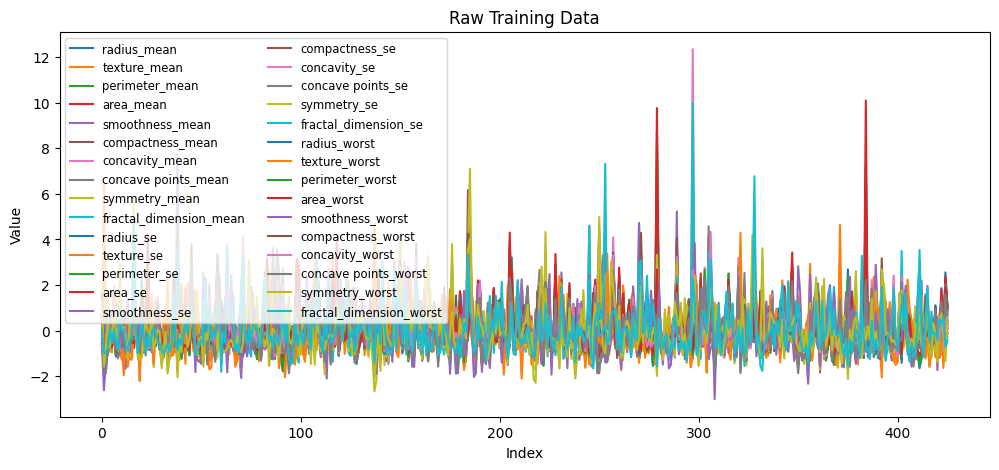

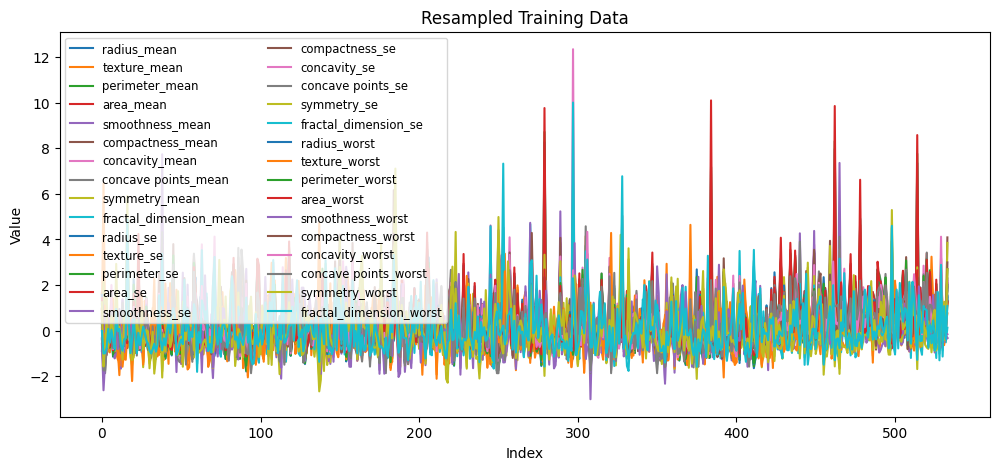

In [6]:
##################################################
###### STEP 5: VISUALIZE CLASS DISTRIBUTIONS #####
##################################################

plt.figure(figsize=(12, 5))
plt.title("Raw Training Data")
for i in range(X_train.shape[1]):
    plt.plot(X_train[:, i], label=features[i])
plt.legend(loc="best", fontsize="small", ncol=2)
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=(12, 5))
plt.title("Resampled Training Data")
for i in range(X_resampled.shape[1]):
    plt.plot(X_resampled[:, i], label=features[i])
plt.legend(loc="best", fontsize="small", ncol=2)
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

# Step 6: Evaluation Metrics Reflection



In [7]:
##################################################
######### STEP 7: TRAIN-VALIDATION SPLIT #########
##################################################

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.20, random_state=35)
print(f"X_train: {X_train}")
print(f"y_train: {y_train}")
print(f"X_val: {X_val}")
print(f"y_val: {y_val}")

X_train: [[-0.29946865 -0.85277322 -0.20911877 ...  1.25394435  0.38736016
   3.09821776]
 [ 1.26896165  0.17058725  1.13163326 ...  0.20978293 -0.52986665
  -1.45584187]
 [-1.22621833 -0.82730498 -1.23229284 ... -0.96429511 -0.09655605
  -0.12024733]
 ...
 [-0.31597844  0.01546248 -0.39218375 ... -1.57509936 -0.73228912
  -1.15344311]
 [-0.04907013 -0.82962027 -0.11440254 ... -0.50302322 -1.21146106
  -0.92280927]
 [-0.33523986  0.02472366 -0.31617199 ... -0.25526122  1.09742023
   0.4226461 ]]
y_train:     diagnosis
105         1
277         1
273         0
288         0
255         1
..        ...
312         0
82          1
58          0
439         0
331         0

[340 rows x 1 columns]
X_val: [[ 0.13528922 -1.21858986  0.22904329 ... -0.07087318 -0.11869601
   0.4456547 ]
 [-0.68469714 -0.47538011 -0.70777187 ... -0.08445331 -0.52195952
  -0.71080144]
 [-0.58839002 -1.50568647 -0.62181092 ... -0.68273366 -0.6136822
  -0.27199454]
 ...
 [-0.26369743  0.20531668 -0.22264966 ...  0

f:\Tyler\Documents\College, Part 2\CSCI-635\csci-635_assignment-2\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
f:\Tyler\Documents\College, Part 2\CSCI-635\csci-635_assignment-2\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
f:\Tyler\Documents\College, Part 2\CSCI-635\csci-635_assignment-2\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
f:\Tyler\Documents\College, Part 2\CSCI-635\csci-635_assignment-

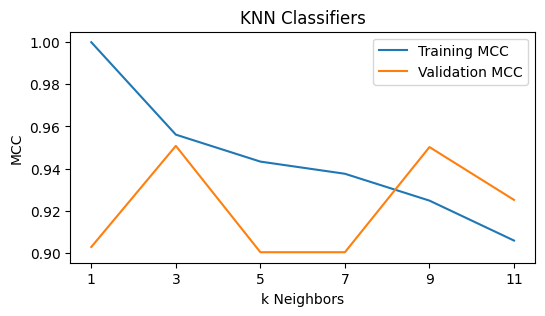

f:\Tyler\Documents\College, Part 2\CSCI-635\csci-635_assignment-2\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\Tyler\Documents\College, Part 2\CSCI-635\csci-635_assignment-2\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\Tyler\Documents\College, Part 2\CSCI-635\csci-635_assignment-2\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\Tyler\Documents\College, Part 2\CSCI-635\csci-635_assignme

,KNN,Decision Tree,Support Vector Machine,Random Forest,AdaBoost
Score,0.950799,0.81674,0.975262,0.876634,0.900324
Parameters,{'k': 3},{'max_depth': 6},"{'kernel': 'poly', 'C': 1, 'degree': 1}","{'n_estimators': 25, 'max_features': 2}",{'n_estimators': 100}


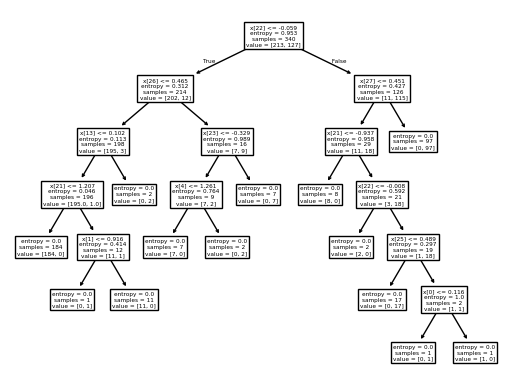

In [10]:
##################################################
### STEP 8: MODEL SELECTION WITH MANUAL SEARCH ###
##################################################

# MODELS
# 1. KNN Classifier

k_counts = [1, 3, 5, 7, 9, 11]
mcc_train_scores = list()
mcc_val_scores = list()

highest_scoring_knn = -1
highest_scoring_knn_parameters = {}

for n in range(0, len(k_counts)):
	knn = KNeighborsClassifier(n_neighbors=k_counts[n]).fit(X_train, np.asarray(y_train))
	y_pred = knn.predict(X_train)
	mcc_train_scores.append(matthews_corrcoef(y_train, y_pred))
	y_pred = knn.predict(X_val)
	mcc_val_scores.append(matthews_corrcoef(y_val, y_pred))

	if mcc_val_scores[n] > highest_scoring_knn:
		highest_scoring_knn = mcc_val_scores[n]
		highest_scoring_knn_parameters = {"k": k_counts[n]}

plt.figure(figsize=(6, 3))
plt.title("KNN Classifiers")
plt.plot(k_counts, mcc_train_scores, label="Training MCC")
plt.plot(k_counts, mcc_val_scores, label="Validation MCC")
plt.xlabel("k Neighbors"); plt.ylabel("MCC")
plt.xticks(k_counts)
plt.legend()
plt.show()

# 2. Decision Tree

depths = [2, 4, 6, 7, 10]
# decision_trees = list()
highest_scoring_tree = -1
highest_scoring_tree_parameters = {}

for max_depth in depths:
	d_tree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=35).fit(X_train, y_train)
	plot_tree(d_tree)
	# decision_trees.append(d_tree)
	y_pred = d_tree.predict(X_val)
	tree_mcc = matthews_corrcoef(y_val, y_pred)
	if tree_mcc > highest_scoring_tree:
		highest_scoring_tree = tree_mcc
		highest_scoring_tree_parameters["max_depth"] = max_depth

# 3. Support Vector Machine
# • Polynomial kernel: C ∈ {10^(−2), 10^(−1), 1}, degree ∈ {1, 2, 3}, coef0 = 1
# • RBF kernel: C ∈ {10^(−2), 10^(−1), 1}

C_set = [10 ** -2, 10 ** -1, 1]
degrees = [1, 2, 3]

# SVC_models = [[], []]

highest_scoring_SVC = -1
highest_scoring_SVC_parameters = {}

for c in C_set:
	for degree in degrees:
		poly_SVC = SVC(C=c, kernel="poly", degree=degree, coef0=1, random_state=35).fit(X_train, y_train)
		# SVC_models[0].append(poly_SVC)

		# calculate MCC
		y_pred = poly_SVC.predict(X_val)
		poly_mcc = matthews_corrcoef(y_val, y_pred)
		if poly_mcc > highest_scoring_SVC:
			highest_scoring_SVC = poly_mcc
			highest_scoring_SVC_parameters = {"kernel": "poly", "C" : c, "degree": degree}
	rbf_SVC = SVC(C=c, kernel="rbf", random_state=35).fit(X_train, y_train)
	# SVC_models[1].append(rbf_SVC)

	# calculate MCC
	y_pred = poly_SVC.predict(X_val)
	rfb_mcc = matthews_corrcoef(y_val, y_pred)
	if rfb_mcc > highest_scoring_SVC:
		highest_scoring_SVC = rfb_mcc
		highest_scoring_SVC_parameters = {"kernel": "rfb", "C" : c}

# 4. Random Forest
# max_features ∈ {2, 4, 8, 16}, n_estimators ∈ {25, 50, 100}

max_features_set = [2, 4, 8, 16]
n_estimators_set = [25, 50, 100]

highest_scoring_forest = -1
highest_scoring_forest_parameters = {}

for max_features in max_features_set:
	for n_estimators in n_estimators_set:
		forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=35).fit(X_train, y_train)
		y_pred = forest.predict(X_val)
		forest_mcc = matthews_corrcoef(y_val, y_pred)
		if forest_mcc > highest_scoring_forest:
			highest_scoring_forest = forest_mcc
			highest_scoring_forest_parameters = {"n_estimators": n_estimators, "max_features": max_features}

# 5. AdaBoost
# n_estimators ∈ {10, 25, 50, 100}

n_estimators_set = [10, 25, 50, 100]

highest_scoring_boost = -1
highest_scoring_boost_parameters = {}

for n_estimators in n_estimators_set:
	adaboost = AdaBoostClassifier(n_estimators=n_estimators, random_state=35).fit(X_train, y_train)
	y_pred = adaboost.predict(X_val)
	boost_mcc = matthews_corrcoef(y_val, y_pred)
	if boost_mcc > highest_scoring_boost:
		highest_scoring_boost = boost_mcc
		highest_scoring_boost_parameters = {"n_estimators": n_estimators}


# Build Table
mcc_table = pandas.DataFrame({	"KNN": {
									"Score": highest_scoring_knn, "Parameters": highest_scoring_knn_parameters
								},
								"Decision Tree": {
									"Score": highest_scoring_tree, "Parameters": highest_scoring_tree_parameters
								},
								"Support Vector Machine": {
									"Score": highest_scoring_SVC, "Parameters": highest_scoring_SVC_parameters
								},
								"Random Forest": {
									"Score": highest_scoring_forest, "Parameters": highest_scoring_forest_parameters
								},
								"AdaBoost": {
									"Score": highest_scoring_boost, "Parameters": highest_scoring_boost_parameters
								}
							 })

mcc_table